In [53]:
#importing libraries for data manipulation
import pandas as pd
import numpy as np

In [54]:
#reading the data using pandas
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [55]:
print(data.shape)
data.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [56]:
#checking the number of cases
not_fraud = data[data["Class"] == 0]
fraud = data[data["Class"] == 1]
print("Number of cases\n1. Fraud : {}\n2. Not Fraud : {}".format(len(fraud),len(not_fraud)))

Number of cases
1. Fraud : 492
2. Not Fraud : 284315


In [57]:
sample = not_fraud.sample(984)
data = fraud.append(sample)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1848\568177647.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = fraud.append(sample)


In [58]:
#organizing the data
features = data[data.iloc[:, 1:30].columns]
target = data[data.iloc[:1, 30: ].columns]
features.shape

(1476, 29)

In [59]:

#splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.30)

In [60]:
#training the algorithm and predicting on X_test
from sklearn.linear_model import LogisticRegression

alg1 = LogisticRegression()
alg1.fit(X_train, Y_train)

predict_data = alg1.predict(X_test)


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
#using numpy to save the predicted data and test data
np.savetxt("my_data_predict.csv", predict_data, delimiter=",")
np.savetxt("my_data_test.csv", Y_test, delimiter=",")

In [62]:
#Using the confusion matrix for the True Positive, False Positive, False Negative, and True Negative values
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, predict_data)
print(confusion_matrix)

[[285   4]
 [ 23 131]]


In [63]:
#Numerical Analysis of the predicted dat
from sklearn.metrics import classification_report
print(classification_report(Y_test, predict_data))

from sklearn.metrics import accuracy_score
print("The accuracy score : ",accuracy_score(Y_test, predict_data))

from sklearn.metrics import precision_score
print("The precision score : ",precision_score(Y_test, predict_data), )

from sklearn.metrics import recall_score
print("The recall score : ",recall_score(Y_test, predict_data))

from sklearn.metrics import f1_score
print("The f1 score : ",f1_score(Y_test, predict_data))

              precision    recall  f1-score   support

           0       0.93      0.99      0.95       289
           1       0.97      0.85      0.91       154

    accuracy                           0.94       443
   macro avg       0.95      0.92      0.93       443
weighted avg       0.94      0.94      0.94       443

The accuracy score :  0.9390519187358917
The precision score :  0.9703703703703703
The recall score :  0.8506493506493507
The f1 score :  0.9065743944636678


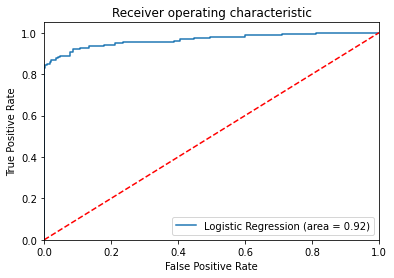

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_RA = roc_auc_score(Y_test, alg1.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, alg1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_RA)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
print(alg1.score(X_train,Y_train))
print(alg1.score(X_test,Y_test))

0.9661181026137464
0.9390519187358917
